In [1]:
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud


URL = 'https://www.dcard.tw/f/funny/p/230628750-幹！這我男友哦！'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
resp = requests.get(URL, headers=headers)
soup = BeautifulSoup(resp.text, 'html.parser')

articles = []
# 利用 regex 找出所有 'PostList_wrapper_' 開頭的 div
# for div in soup.find_all('div', re.compile('PostEntry_content_\w{5}')):
#     articles.append(
#         {'title': div.h3.text.strip(),
#          'excerpt': div.find_all('div')[0].text.strip(),
#          'bookmark': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
#          'response': re.findall(r'\d+', div.find_all('div')[1].text.strip())[1],
#          'href': div.parent.parent['href']
#         }
#     )
# print('共 %d 篇' % (len(articles)))
# for a in articles[:3]:
#     print(a)
#CommentEntry_content_1ATrw1
tags = soup.find_all('div', re.compile('CommentEntry_content_1ATrw1'))
tags

[<div class="CommentEntry_content_1ATrw1"><div><div><div>滑著相簿裡的照片 疑惑著我與男友的照片怎麼都消失了</div></div><div><div>下一刻手機的畫面逐漸模糊</div></div><div><div>才發現我是真的沒有男友</div></div><div><div>模糊的螢幕充滿的是淚水(ಥ_ಥ)</div></div></div></div>,
 <div class="CommentEntry_content_1ATrw1"><div><div><div>愛的小魔仙之閃亮亮星光魔法~</div></div></div></div>,
 <div class="CommentEntry_content_1ATrw1"><div><div><div>滑著相簿裡的照片 疑惑著我與男友的照片怎麼都消失了</div></div><div><div>下一刻手機的畫面逐漸模糊</div></div><div><div>才發現我是真的沒有男友</div></div><div><div>模糊的螢幕充滿的是淚水(ಥ_ಥ)</div></div></div></div>,
 <div class="CommentEntry_content_1ATrw1"><div><div><div>我也會這樣哈哈哈哈</div></div><div><div>雖然已經第二任 但還是會有種不可思議的感覺</div></div></div></div>,
 <div class="CommentEntry_content_1ATrw1"><div><div><div>但是我是有男友被放生被消失像沒男友(ಥ_ಥ)</div></div></div></div>,
 <div class="CommentEntry_content_1ATrw1"><div><div><div>之前有很長一段時間沒對象</div></div><div><div>導致有男友之後常常會脫口而出</div></div><div><br/></div><div><div>“我這個單身狗”這類的話</div></div><div><br/></div><div><div>然後下一秒再回過神</div></div><div><div>阿 對 我不是單身狗了😂😂

In [95]:
te = ''
for i in range(len(tags)):
    te += tags[i].text
te

'愛的小魔仙之閃亮亮星光魔法~滑著相簿裡的照片 疑惑著我與男友的照片怎麼都消失了下一刻手機的畫面逐漸模糊才發現我是真的沒有男友模糊的螢幕充滿的是淚水(ಥ_ಥ)我也會這樣哈哈哈哈雖然已經第二任 但還是會有種不可思議的感覺'

## 寫成class

In [193]:
import requests
import re
from bs4 import BeautifulSoup
class Dcard:
    
    def __init__(self):
        self.articles = ''
        self.top_articles = ''
        self.hot_articles = ''
        self.latest_articles = ''
    
    
    def crawl_dcard_top(self):
        URL = 'https://www.dcard.tw/f'
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
        resp = requests.get(URL, headers=headers)
        soup = BeautifulSoup(resp.text, 'html.parser')

        articles = []
        # 利用 regex 找出所有 'PostList_wrapper_' 開頭的 div
        for div in soup.find_all('div', re.compile('PostEntry_content_\w{5}')):
            articles.append(
                {'title': div.h3.text.strip(),
                 'excerpt': div.find_all('div')[0].text.strip(),
                 'bookmark': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
                 'response': re.findall(r'\d+', div.find_all('div')[1].text.strip())[1],
                 'href': div.parent.parent['href']
                }
            )
        print("抓取主頁資料完成...")
        self.top_articles = articles
        return articles

    def crawl_board_latest(self , forum_name):
        url_base = 'https://www.dcard.tw/f/'
        residual_url = '?latest=true'
        URL = url_base + forum_name + residual_url
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
        resp = requests.get(URL, headers=headers)
        soup = BeautifulSoup(resp.text, 'html.parser')

        articles = []

        #利用 regex 找出所有 'PostList_wrapper_' 開頭的 div
        for div in soup.find_all('div', re.compile('PostEntry_content_\w{5}')):
            articles.append(
                {'title': div.h3.text.strip(),
                 'excerpt': div.find_all('div')[0].text.strip(),
                 'bookmark': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
                 'response': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
                 'href': div.parent.parent['href']
                }
            )
        print('共 %d 篇最新文章' % (len(articles)))
        #print('第一篇：',articles[0])
        self.latest_articles = articles
        return articles
   
    def crawl_board_hottest(self , forum_name):
        url_base = 'https://www.dcard.tw/f/'
        residual_url = '?latest=false'
        URL = url_base + forum_name + residual_url
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
        resp = requests.get(URL, headers=headers)
        soup = BeautifulSoup(resp.text, 'html.parser')

        articles = []

        #利用 regex 找出所有 'PostList_wrapper_' 開頭的 div
        for div in soup.find_all('div', re.compile('PostEntry_content_\w{5}')):
            articles.append(
                {'title': div.h3.text.strip(),
                 'excerpt': div.find_all('div')[0].text.strip(),
                 'bookmark': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
                 'response': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
                 'href': div.parent.parent['href']
                }
            )
        print('共 %d 篇熱門文章' % (len(articles)))
        #print('第一篇：',articles[0])
        self.hot_articles = articles
        return articles
class TextSelector():
     
    def __init__(self,articles):
        self.articles = articles
        
    def getResponseContent(self , sheet = 0):
        use_url = self.getHref(sheet) 
        URL = use_url
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
        resp = requests.get(URL, headers=headers)
        soup = BeautifulSoup(resp.text, 'html.parser')

        tags = soup.find_all('div', re.compile('CommentEntry_content_1ATrw1'))
        response_content = ''
        for i in range(len(tags)):
            response_content += tags[i].text 
        return response_content
    
    def getAllResponse(self):
        all_responese = ''
        articles = self.articles
        文章總數 = len(articles)
        for i in range(文章總數):
            all_responese += self.getResponseContent(i)
        print('共抓了'+ str(文章總數) +'篇文的回覆資料')
        return all_responese

    def getContent(self, sheet = 0):
        return self.articles[sheet]["excerpt"]
   
    def getTitle(self ,sheet = 0):
        return self.articles[sheet]['title']
    
    def getMood(self ,sheet = 0):
        return self.articles[sheet]['bookmark']
    
    def getResponse(self ,sheet = 0):
        return float(self.articles[sheet]['response'])
    
    def getHref(self , sheet=0):
        url_base = 'https://www.dcard.tw'
        url = url_base + self.articles[sheet]['href']
        return url

In [ ]:
dcard = Dcard()
Main = dcard.crawl_board_hottest("trending")
selector = TextSelector(Main)
content = selector.getResponseContent(3)
content

(-0.5, 399.5, 199.5, -0.5)

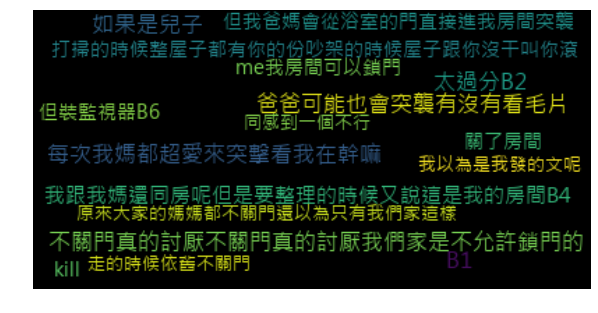

In [132]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
#removed_word = ['之銘言', '引述' , '心得','Soft_Job' , '例如' ,'公告']
# for word in removed_word:
#     titles = titles.replace(word , '')
wordcloud = WordCloud(font_path=font_path).generate(content)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 文本分析

In [161]:
import pandas
mydata = pandas.read_csv("/Users/Dennis/data_science/text_asset/SentimentDict.csv")
# degree-1 => 乘 1.8
# 列印degree_dict長度
degree_dict = {}

# 列印出positive詞庫個數
positives_set=set(mydata['positive'])
print(len(positives_set))
# 5006
# 列印出negative詞庫個數
negatives_set = set(mydata['negative'])
print(len(negatives_set))
# 4686

# 列印出否定詞詞庫個數
not_set = set(mydata['not'])
print(len(not_set))
# 214

for word in mydata['degree-1']:
    degree_dict[word] = 1.8
print(len(degree_dict))
# 69
# degree-2 => 乘 1.6
for word in mydata['degree-2']:
    degree_dict[word] = 1.6
print(len(degree_dict))
# 112
# degree-3 => 乘 1.4
for word in mydata['degree-3']:
    degree_dict[word] = 1.4
print(len(degree_dict))
# 146
# degree-4 => 乘 1.2
for word in mydata['degree-4']:
    degree_dict[word] = 1.2
print(len(degree_dict))
# 174
# degree-5 => 乘 1.1
for word in mydata['degree-5']:
    degree_dict[word] = 1.1
print(len(degree_dict))
# 186
# degree-6 => 乘 0.9
for word in mydata['degree-6']:
    degree_dict[word] = 0.9
print(len(degree_dict))
# 213

5006
4686
214
69
112
146
174
186
213


## 準備寫成class

In [202]:
def hasOpposite(wordlist):
    for word in wordlist:
        if word in not_set:
            return True
    return False

def getDegree(wordlist):
    degree = 1
    for word in wordlist:
        if word in degree_dict:
            degree = degree_dict[word]
    return degree

import jieba
def analyze(text):
    token = list(jieba.cut(text))
    sum = 0
    for word in token:
        if word.lower() in positives_set:
            sum +=1
        elif word.lower() in negatives_set:
            sum -= 1
    if hasOpposite:
        sum = -sum
    sum = sum * getDegree(token)
    return sum
def sentiment_analyze(text):
    sentiment = '一般'
    score = analyze(text)
    print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return sentiment

def sentiment_analysis(text):
    sentiment = '一般'
    score = analyze(text)
    #print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return score
def article_analysis(board ,show = False):
    select_board = TextSelector(Main)
    文章數目  = len(select_board.articles)
    # content = selector.getResponseContent(3)
    # content
    sum = 0
    for i in range(文章數目):
        content = select_board.getResponseContent(i)
        response_num = select_board.getResponse(i)
        score = sentiment_analysis(content)
        avg_score = round(score/response_num , 2)
        sum += avg_score
        title = select_board.getTitle(sheet=i)
        if show == True:
            print('文章:{}的平均分數是：{}'.format(title , avg_score))
    return sum

In [191]:
def hasOpposite(wordlist):
    for word in wordlist:
        if word in not_set:
            return True
    return False

def getDegree(wordlist):
    degree = 1
    for word in wordlist:
        if word in degree_dict:
            degree = degree_dict[word]
    return degree
import jieba
def analyze(text):
    token = list(jieba.cut(text))
    sum = 0
    for word in token:
        if word.lower() in positives_set:
            sum +=1
        elif word.lower() in negatives_set:
            sum -= 1
    if hasOpposite:
        sum = -sum
    sum = sum * getDegree(token)
    return sum
def sentiment_analyze(text):
    sentiment = '一般'
    score = analyze(text)
    print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return sentiment

def sentiment_analysis(text):
    sentiment = '一般'
    score = analyze(text)
    #print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return score

In [184]:
# 測試
text = '我很不高興'
print('正負向：',sentiment_analyze(text))

情感分數： -1.6
正負向： 負向


In [201]:
Main = dcard.crawl_board_hottest("funny")
select_board = TextSelector(Main)
文章數目  = len(select_board.articles)
# content = selector.getResponseContent(3)
# content
sum = 0
for i in range(文章數目):
    content = select_board.getResponseContent(i)
    response_num = select_board.getResponse(i)
    score = sentiment_analysis(content)
    avg_score = round(score/response_num , 2)
    sum += avg_score
    title = select_board.getTitle(sheet=i)
#     print('文章:{} 的分數是：{}'.format(title , avg_score))
# sum

共 30 篇熱門文章


In [ ]:
def article_analysis(board ,show = False):
    select_board = TextSelector(Main)
    文章數目  = len(select_board.articles)
    # content = selector.getResponseContent(3)
    # content
    sum = 0
    for i in range(文章數目):
        content = select_board.getResponseContent(i)
        response_num = select_board.getResponse(i)
        score = sentiment_analysis(content)
        avg_score = round(score/response_num , 2)
        sum += avg_score
        title = select_board.getTitle(sheet=i)
        if show == True:
            print('文章:{}的平均分數是：{}'.format(title , avg_score))
    return sum

## 函數開發過程

In [159]:
import requests
import json


DCARD_URL = 'https://www.dcard.tw'
DCARD_API = DCARD_URL + '/_api/posts?popular=true'


def show(post):
    for key in ['id', 'title', 'excerpt', 'likeCount', 'commentCount']:
        print('%s: %s' %(key, post[key]))
    print('href: %s/f/%s/p/%s' %(DCARD_URL, post['forumAlias'], post['id']))



num_page = 5
requests.get(DCARD_API).text
#posts = list(requests.get(DCARD_API).json())
             #json())
# for i in range(1, num_page):
#     id_last_post = posts[-1]['id']
#     posts += list(requests.get(DCARD_API + '&before=' + str(id_last_post)).json())
# print('共 %d 頁, %d 篇文章' %(num_page, len(posts)))
# print('第 1 篇:')
# show(posts[0])
# print('第 %d 篇:' %(len(posts)))
# show(posts[-1])

'<!DOCTYPE HTML>\n<html lang="en-US">\n<head>\n  <meta charset="UTF-8" />\n  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n  <meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />\n  <meta name="robots" content="noindex, nofollow" />\n  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />\n  <title>Just a moment...</title>\n  <style type="text/css">\n    html, body {width: 100%; height: 100%; margin: 0; padding: 0;}\n    body {background-color: #ffffff; font-family: Helvetica, Arial, sans-serif; font-size: 100%;}\n    h1 {font-size: 1.5em; color: #404040; text-align: center;}\n    p {font-size: 1em; color: #404040; text-align: center; margin: 10px 0 0 0;}\n    #spinner {margin: 0 auto 30px auto; display: block;}\n    .attribution {margin-top: 20px;}\n    @-webkit-keyframes bubbles { 33%: { -webkit-transform: translateY(10px); transform: translateY(10px); } 66% { -webkit-transform: translateY(-10px); transform: transl

In [ ]:
def getResponseContent(sheet = 0):
    use_url = articles.getHref(sheet) #這邊還要再修
    URL = use_url
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    resp = requests.get(URL, headers=headers)
    soup = BeautifulSoup(resp.text, 'html.parser')

    articles = []
    tags = soup.find_all('div', re.compile('CommentEntry_content_1ATrw1'))
    response_content = ''
    for i in range(len(tags)):
        response_content += tags[i].text
    return response_content
    
def getAllResponse():
    all_responese = ''
    文章總數 = len(articles)
    for i in range(文章總數):
        all_responese += getResponseContent(i)
    print('共抓了'+len(文章總數) +'篇文的回覆資料')
    return all_responese


In [3]:
def crawl_dcard():
    URL = 'https://www.dcard.tw/f'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    resp = requests.get(URL, headers=headers)
    soup = BeautifulSoup(resp.text, 'html.parser')

    articles = []
    # 利用 regex 找出所有 'PostList_wrapper_' 開頭的 div
    for div in soup.find_all('div', re.compile('PostEntry_content_\w{5}')):
        articles.append(
            {'title': div.h3.text.strip(),
             'excerpt': div.find_all('div')[0].text.strip(),
             'bookmark': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
             'response': re.findall(r'\d+', div.find_all('div')[1].text.strip())[1],
             'href': div.parent.parent['href']
            }
        )
    
    return articles

In [4]:
#   host = 'https://www.dcard.tw/'

#     def forums(self):
#         return Route.host + '_api/forums'

#     def posts_meta(self, forum):
#     #return Route.host + '_api/forums/{forum}/posts'.format(forum=forum)
#     return Route.host + '_api/forums/' + forum +'/posts'

#     def post(self, post_id, addition=None):
#         #base = Route.host + '_api/posts/{id}'.format(id=post_id)
#         base = Route.host + '_api/posts/'+ post_id
#         if addition:
#             return base + '/' + addition
#         return base

In [33]:
def crawl_dcard_board_latest(forum_name):
    url_base = 'https://www.dcard.tw/f/'
    residual_url = '?latest=true'
    URL = url_base + forum_name + residual_url
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    resp = requests.get(URL, headers=headers)
    soup = BeautifulSoup(resp.text, 'html.parser')

    articles = []
    
    #利用 regex 找出所有 'PostList_wrapper_' 開頭的 div
    for div in soup.find_all('div', re.compile('PostEntry_content_\w{5}')):
        articles.append(
            {'title': div.h3.text.strip(),
             'excerpt': div.find_all('div')[0].text.strip(),
             'bookmark': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
             'response': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
             'href': div.parent.parent['href']
            }
        )
    print('共 %d 篇' % (len(articles)))
    print('第一篇：',articles[0])
    return articles

In [44]:
def crawl_dcard_board_hotest(forum_name):
    url_base = 'https://www.dcard.tw/f/'
    residual_url = '?latest=false'
    URL = url_base + forum_name + residual_url
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    resp = requests.get(URL, headers=headers)
    soup = BeautifulSoup(resp.text, 'html.parser')

    articles = []
    
    #利用 regex 找出所有 'PostList_wrapper_' 開頭的 div
    for div in soup.find_all('div', re.compile('PostEntry_content_\w{5}')):
        articles.append(
            {'title': div.h3.text.strip(),
             'excerpt': div.find_all('div')[0].text.strip(),
             'bookmark': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
             'response': re.findall(r'\d+', div.find_all('div')[1].text.strip())[0],
             'href': div.parent.parent['href']
            }
        )
    print('共 %d 篇' % (len(articles)))
    print('第一篇：',articles[0])
    return articles

In [35]:
articles = crawl_dcard_board('funny')

[{'title': '他不是盧廣仲!', 'excerpt': '在韓國彩妝節目看到的......，好像是一位日本的美妝大師吧…不是盧廣仲，但是好像 X"D', 'bookmark': '0', 'response': '0', 'href': '/f/funny/p/230628968-他不是盧廣仲!'}, {'title': '幹！這我男友哦！', 'excerpt': '因為寒假不太能見面所以只好拿出手機來看看男友的影片解相思之愁，可能看太多遍，導致神經錯亂，想說這畫面是哪位，幹！這我男朋友哦，原來我有男朋友...，這真的是我男友哦天，他是我男友欸（指著螢幕朝著旁邊喊即使旁邊沒有人）', 'bookmark': '5', 'response': '5', 'href': '/f/funny/p/230628750-幹！這我男友哦！'}, {'title': '我姊過年戰力滿點', 'excerpt': '親戚 ： 什麼時候結婚，我姊 ： 你們不是投下不同意票了嗎？親戚 ： .........', 'bookmark': '20', 'response': '20', 'href': '/f/funny/p/230628712-我姊過年戰力滿點'}, {'title': '#圖 #女裝 #我想玩弟弟很久了', 'excerpt': '大家好 新年快樂 我是足各（*ﾟ∀ﾟ）丿，第一次在有趣版發文，還請各位大力鞭打（*´ω｀*）<不，先放上大修後的圖來鎮樓，寒假弟弟回家，我看弟弟的眉毛不爽很久了（我家都大濃眉，所以就，嗯 還行（其實就修修雜毛', 'bookmark': '15', 'response': '15', 'href': '/f/funny/p/230628687-＃圖-＃女裝-＃我想玩弟弟很久了'}, {'title': '蘋果為什麼討厭華為', 'excerpt': '中美大戰...美國總是拿華為開刀，原因是什麼？看到華為logo，我好像明白了什麼事。.，.，.', 'bookmark': '12', 'response': '12', 'href': '/f/funny/p/230628607-蘋果為什麼討厭華為'}, {'title': '潔癖害我憋的好累', 'excerpt': '大家好新年快樂，今天除夕回阿嬤家吃年夜飯，阿嬤家雖然在台北鬧

In [56]:
def getContent(sheet = 0):
    return articles[sheet]["excerpt"]
def getTitle(sheet = 0):
    return articles[sheet]['title']
def getMood(sheet = 0):
    return articles[sheet]['bookmark']
def getResponse(sheet = 0):
    return articles[sheet]['response']
def getHref(sheet=0):
    url_base = 'https://www.dcard.tw'
    url = url_base + articles[sheet]['href']
    return url

In [55]:
articles[5]["href"]

'/f/funny/p/230628562-潔癖害我憋的好累'